# Bootstrap & Permutation Tests

Acts:

1. The Null Hypothesis
2. Permutation testing
3. The Bootstrap

The lecture draws from Chapters 5 of James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r."

---
# 1. The Null Hypothesis

In the last lecture we mentioned how the _p-value_ is a probability estimate that you would obtain the data you have given that the null hypothesis is true. Now let's take a closer look at what the null hypothesis is in the context of _parametric tests_. 

Consider a simple Student's t-test. Remember that the form of a two-sample t-test is.

$$ t = \frac{\mu_A - \mu_B}{\sigma_{A,B}}$$

Let's look carefully at this statistic and what it is telling us. The core evaluation is the difference in the means (i.e., $\mu_A - \mu_B$) in the numerator. The denominator is the pooled standard deviation of groups A and B (essentially it's the average standard deviation between the two groups, which is why an assumption of the t-test is that the variances are equal). So essentially it is calculating the ratio of the difference in the means relative to their distributions.

The way we typically interpret a t-test is to calculate the t-value, take the degrees of freedom (n-1), and getthe corresponding p-value from a look up table.

But take a closer look. What is the null hypothesis here? At first glance it would appear that the null is that the difference in the means is 0 (i.e., $\mu_A - \mu_B = 0$). However, this is not completely correct. The null hypothesis for a t-test is that the difference between the means is 0, _relative to the deviation of the values in the two groups_. In other words, the t-test makes the assumption that you could get a non-zero difference between two means if they were sampled from the same distribution just by chance.

This is what makes the t-test a parametric test. It is assuming a particular shape of the null disribution. In this case it assumes that the null is sampled from a normal distribution with a mean of 0 and a standard deviation of $\sigma_{A,B}$ (i.e., $H_0 \sim N(0, \sigma_{A,B})$). 

But what happens if your data doesn't meet the assumptions of the t-test? What if the data isn't normally distributed? What if the two groups don't have equal variances? 

In situations like these the shape of the **real** null distribution doesn't match our assumption of $N(0, \sigma_{A,B})$.

So instead of assuming a particular shape or form of your null distribution, why not just estimate what your chance distribution is in the first place?


---
# Permutation testing (resampling without replacement).

Permutation tests are ways of using resampling procedures to direclty estimate what chance would look like use the data set that you have. Thus it is a _nonparametric_ class of statistics. You can use permutation tests to generate a null distribution for hypothesis testing for **any** form of $Y=f(X)$. 

<br>
## The Algorithm

All permutation tests follow the same four steps.

1. Calculate the original comparison of interest (e.g., differnece of means, correlation, regression) on the original data set.
2. Run _m_ iterations where you permute _across the comparison of interest_
    * For example, if comparing between means, scramble group assignment, if running a regression, shuffle the ordering of either $X$ or $Y$ (or both).
    
3. On each iteration re-calculate the comparison of interest and save the value.
4. Once all _m_ permuted tests are completed, calculate the probability that you observed a stronger effect in the permutation set than in the original, unpermuted data set.

<br>
This is called a resampling _without_ replacement procedure, because on each iteration you are randomly sampling from the data to build a new data set but only selecting each observation one. 

<br>
**Example:**

Let's consider the housing data set from Boston included in the MASS libary. For this example we'll just look at the median housing value (_medv_) and the dummy variable indicating whether the neighborhood is along the Charles River (_chas_)


In [151]:
library(MASS)
attach(Boston)
df = data.frame(medv,chas)
df

The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 5):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 6):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 7):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 8):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 9):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, 

medv,chas
24.0,0
21.6,0
34.7,0
33.4,0
36.2,0
28.7,0
22.9,0
27.1,0
16.5,0
18.9,0


Using this dataset, let's consider two scenarios where we would use a permutation test to build a null hypothesis for evaluating an effect.

<br>
**Regression:**

Step 1: Take the original, unpermuted data $Y=[y_1 ... y_n]$, $X=[x_1... x_n]$ and calculate the regression coefficients for $Y = \beta_0 + \beta_1 X_{attention}$ as $\hat{\beta}_{real}=inv(X'X)^{-1}X'Y$

Step 2: For _i_ = 1 through _m_ iterations:
* Permute new vectors $X$ & $Y$: e.g., $Y-i*=[y_2,y_n, ... y_4]$ $X_i*=[x_5,x_1, ... x_3]$
* Estimate new regression model: $\hat{\beta}_{i}^*=inv(X*'X*)^{-1}X*'Y*$

Step 3: Calculate the probability that the magnitude of $\hat{\beta}^*$ is great than $\hat{\beta}_{real}$.
* $p = P(\hat{\beta}^* > \hat{\beta}_{real}) $

<br>
Let's see this in practice

In [42]:
# Step 1: Calculate the real effect
beta_real = lm(medv~chas)$coefficients[2]

# Step 2: Run m=1000 permutations using the sample function to shuffle the chas variable
beta_perm = matrix(NaN, nrow = 1000)
for (i in 1:1000){
    beta_perm[i]=lm(medv~sample(chas, replace=FALSE))$coefficients[2]    
}

# Step 3: Calculate the p value
beta_real # see if the effect is positive or negative

# Since the real effect is positive we look for permuted results
# that are greater than the observed
p = sum(beta_perm > beta_real)/1000 
p

chas 
6.346157

[1] 0.001

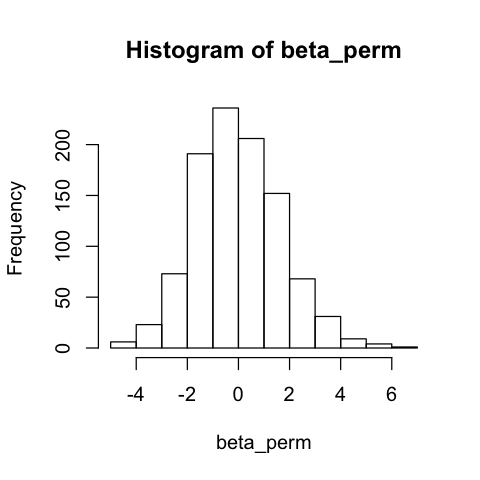

In [35]:
# Just for comparisons, let's look at the histogram of the generated null distribution
options(repr.plot.width=4)
hist(beta_perm)

As you can see the logic is simple. Rather than assume a shape of the null distribution we just asked our data set "hey... what would it look like if there were no relationship between $X$ and $Y$?".

<br>
<br>
We can use the same logic for even simpler tests. Let's go back to the t-test (i.e., a test of differences). We can use the same logic as above for a test of differneces.

<br>
<br>
**Difference Test:**

Step 1: Take the original, unpermuted data $Y=[y_1 ... y_n]$, $X=[x_1... x_n]$ difference in the means of $Y$ for when $X=1$ and $X=0$ (i.e., $\Delta = \hat{Y}_{x=1} - \hat{Y}_{x=0}$)

Step 2: For _i_ = 1 through _m_ iterations:
* Permute new vectors $X$ & $Y$: e.g., $Y-i*=[y_2,y_n, ... y_4]$ $X_i*=[x_5,x_1, ... x_3]$
* Estimate new difference: $\Delta_{i}^*= \hat{Y*}_{x*=1} - \hat{Y*}_{x*=0}

Step 3: Calculate the probability that the magnitude of $\Delta^*$ is great than $\Delta$.
* $p = P(\Delta^* > \Delta) $


[1] 1.470099

[1] 0.302

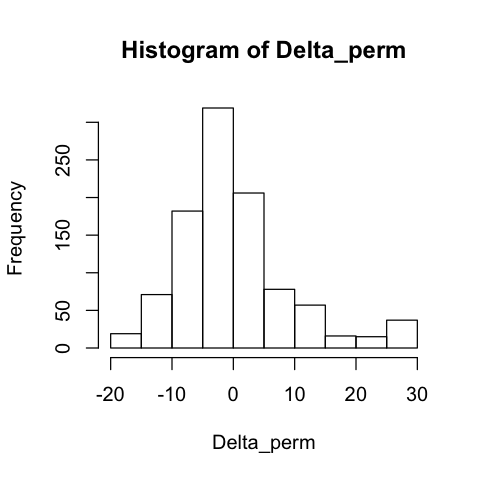

In [68]:
# Step 1: Calculate the real delta
Delta = mean(medv[chas])-mean(medv[-chas])

# Step 2: Run m=1000 permutations using the sample function to shuffle the chas variable
Delta_perm = matrix(NaN, nrow = 1000)
for (i in 1:1000){
    perm_medv = sample(medv, replace=FALSE)
    Delta_perm[i]=mean(perm_medv[chas])-mean(perm_medv[-chas])
}

# Step 3: Calculate the p value
Delta # see if the effect is positive or negative

# Since the real effect is positive we look for permuted results
# that are greater than the observed
p = sum(Delta_perm > Delta)/1000 
p

# Again let's just look at our null distribution
hist(Delta_perm)

## Thinking carefully about nulls

Notice that in this example on differences in means, we don't see a significant effect on the difference in means. This has to do with the fact that there are only 35 neighborhoods out of the entire data set that are along the river (whereas the regression model is not as sensitive to this difference in sample sizes between the two groups). 

But this brings up an important point: **think carefully about what you want your null distribution to be.** 

This is the single most common way that permutation tests are misused. Permutation tests give you a way to test for chance _along a specific dimension_. Sometimes you can think that you're evaluating one null hypothesis, when you're really testing another. Sometimes there might be a bias in the original test you evaluated that will inflate the variance of your simulated null (as is the case here). 

So think very carefully about what you want your null to be in order to make sure you're evaluating the right hypothesis.

---
# 3. The bootstrap: resampling _with_ replacement

Permutation tests give you a way of using your data to simulate your actual null hypothesis by resampling your data _with_ replacement. But what if you want to estimate the confidence of a test statistic? For example, in the lectures on linear regression, we talked about how you can esimate the standard error on a regression coefficient ($SE(\beta)$) as way of determining your confidence in the estimated value.

Just like the example we used above with the t-test, the calculation of $SE(\beta)$, assumes a particular shape of the variance around $\beta$. In this case it assumes it is a normal distribution. But it's possible, and even likely, that the true confidence intervals of your regression coefficient are not normally distributed. 

Now empirically you could estimate the confidence (i.e., reliability) of your regression coefficient by replicating many version of the same experiment. Remember, the [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) states that as you increase your number of observations, the estimated value will converge on the true mean. So over many repetitions of the same experiment, you'll converge to the true value of your effect.

But what if you only have a single data set?

Well you can simulate many different experiments using a method known as _bootstrapping_. Bootstrapping is a resampling with replacement from the data set that you have, in order to simulate repeated experiments form the data

## The Algorithm

1. Calculate the original comparison of interest (e.g., regression coefficient) on the original data set.

2. Run _m_ iterations where you recreate a new data set by randomly pulling observations (i.e., rows) from the original data table. Unlike permutation tests, you are not moving an observation, simply sampling it. So the same observation could get sampled more than once and other observations not at all. Keep sampling until you've created a new data set of equal size to the original sample.

3. Once all _m_ simulated data sets (or _bootstraps_) are completed, calculate the distributional parameters (e.g., mean, standard deviation, confidence interval) of the simulated experiments to estimate the range of possible values your observation could take on.

This process is illustrated in the image below.

![Bootstrapping](imgs/L15_ResampleWithReplacement.png)


<br>
If you have a large enough sample, then the bootstrap converges to the true distribution. Taking an example from the chapter, the image below shows histograms of estimates of investment risk ($\alpha$) obtained from a real distribution (left, orange distribution), a set of 1,000 bootstraps from the real distribution (center, blue distribution), and a comparison of the two distributions as boxplots (right).

![Bootstrap vs. Real](imgs/L15_BootstrapVsReal.png)

As you can see the difference between the real and the bootstrapped distribution is quite minimal. In fact, you can estimate bias in your orignal data set by looking at the differnece between the original parameter (i.e., \#1 in the algorithm above) and the mean of the bootstrap. 

<br>
**Example:**

Building off of the Boston data set again, let's estimate our confidence intervals on the effect of neighborhood poverty (lstat) on median housing price (medv).


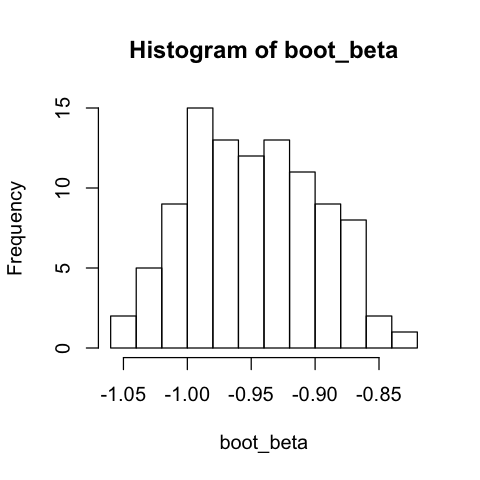

In [146]:
# Calculate the original effect
real_beta = lm(medv~lstat)$coefficients[2]

# Determine the sample size (will be important in a minute)
n = dim(Boston)[1]

# Create a bootstrap of 1000 iterations of the regression model 
boot_beta = matrix(NaN, nrow=100)
for (i in 1:100){
    indx = sample(1:n, replace=TRUE)
    boot_beta[i] = lm(medv[indx]~lstat[indx])$coefficients[2]
}

# Let's look at the bootstrap
hist(boot_beta)

In [148]:
# We can also compare the mean of the bootstrap with the original effect
real_beta # Original regression model
mean(boot_beta) # Mean of the bootstrap

lstat 
-0.9500494

[1] -0.9481488

In [149]:
# Finally we can calculate the confidence intervals
s = sd(boot_beta)
m = mean(boot_beta)
error = qnorm(1-0.025)*s/sqrt(n)
upper_bound = m + error
upper_bound

lower_bound = m - error
lower_bound


[1] -0.943718

[1] -0.9525796